<a href="https://colab.research.google.com/github/michhottinger/project_x/blob/master/covid_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Covid data source is from:  
https://github.com/owid/covid-19-data/tree/master/public/data/  
This notebook is to better explore the data from the Covid CSV.

In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
df.head(10)
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [3]:
df.shape

(62423, 59)

In [4]:
df.sort_values(by='total_deaths', ascending=False, inplace=True)

In [5]:
df.head(20)
df.shape

(62423, 59)

In [6]:
dfdate = df[df['date']=='2021-01-25']
dfdate.shape

(192, 59)

In [7]:
dfpop = dfdate[dfdate['population'] > 6000000]
dfpop.shape

(111, 59)

In [8]:
dfpop.shape

(111, 59)

In [9]:
df_simple = dfdate.loc[:, ('date', 'location', 'total_deaths', 'continent', 'population', 'total_deaths_per_million')]
df_simple['death_pop'] = df_simple['total_deaths']/df_simple['population']

df_short = df_simple[:-150]
df_short.shape

(42, 7)

# Total deaths  
This shows the total not adjusted for population size. Since lives are lost, and every life matters, the raw number is worth looking at and evaluating.

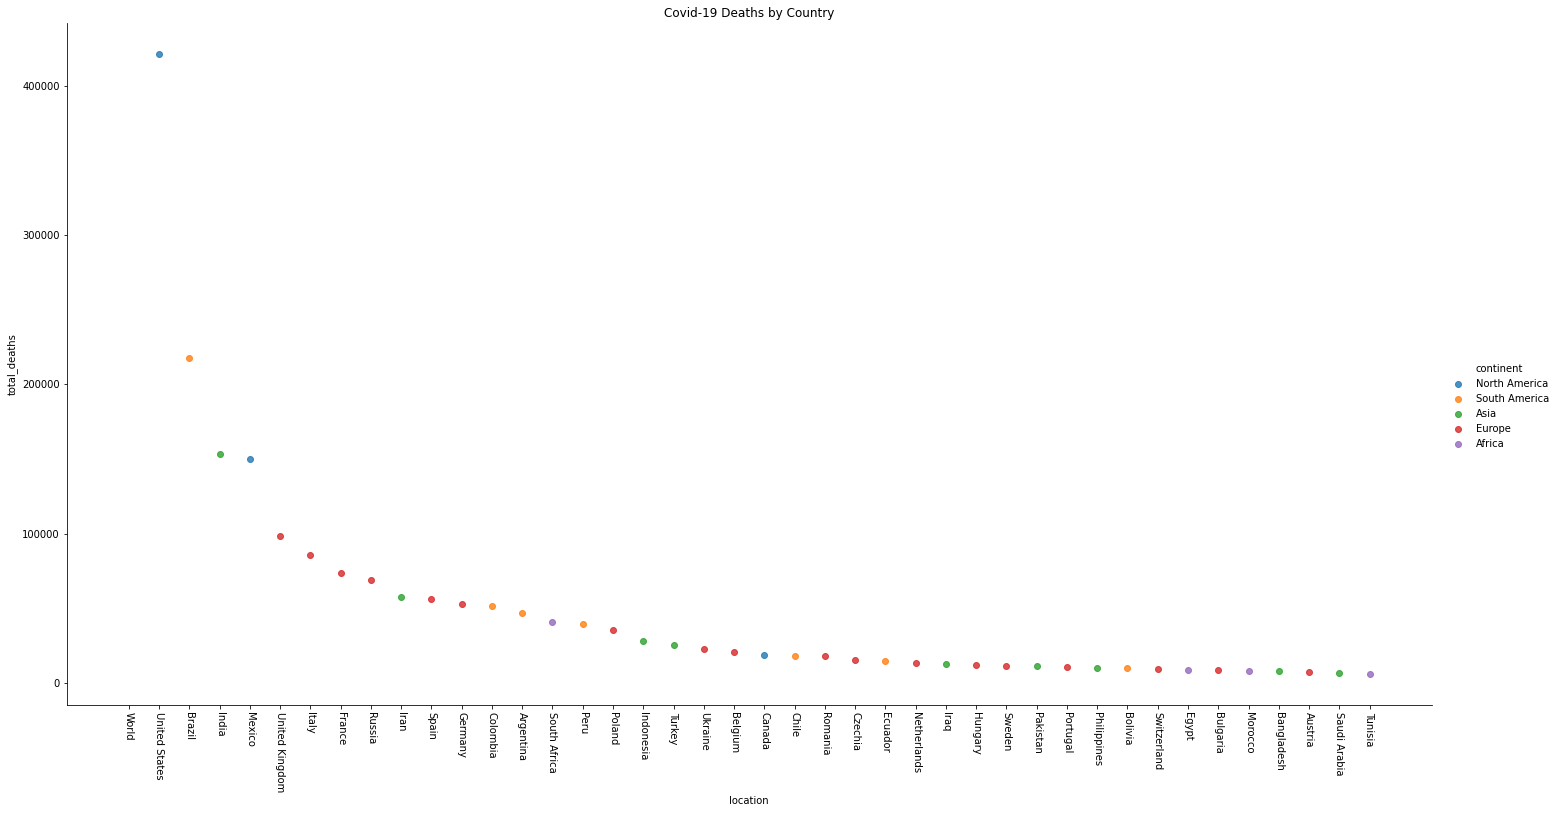

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
#df_short is death/pop for each country
sns.lmplot(x='location', y='total_deaths', data=df_short,
           fit_reg=False, # No regression line
           hue='continent', height=10, aspect=20/10)   # Color by continent

# Set title with matplotlib
plt.title('Covid-19 Deaths by Country')
# Rotate x-labels
plt.xticks(rotation=-90);

# Total deaths divided by total population  
This gives us a raw visual of the worst 50 countries affected by Covid-19 deaths.

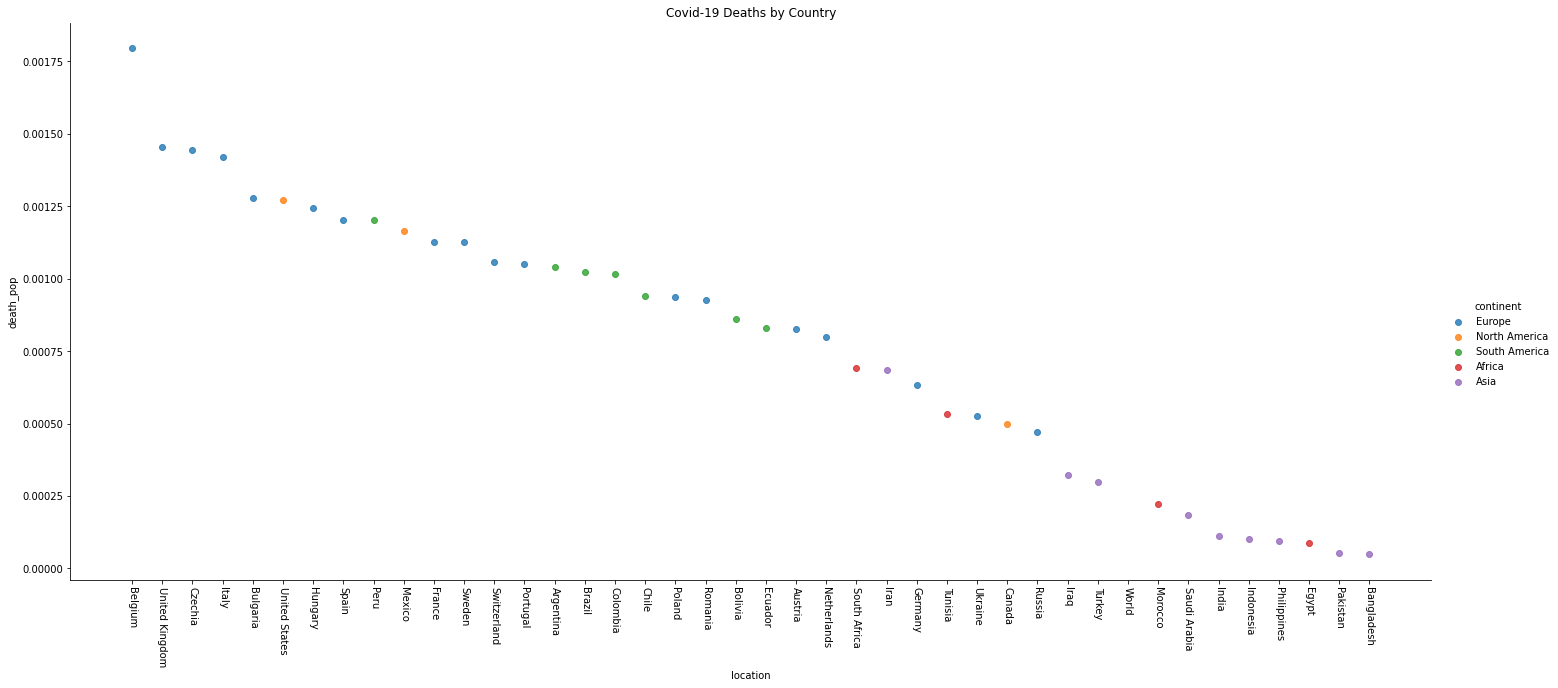

In [11]:
df_ord = df_short.sort_values(by='death_pop', ascending=False)

sns.lmplot(x='location', y='death_pop', data=df_ord,
           fit_reg=False, # No regression line
           hue='continent', height=8.27, aspect=20/8.27)   # Color by continent

# Set title with matplotlib
plt.title('Covid-19 Deaths by Country')
# Rotate x-labels
plt.xticks(rotation=-90);

# Filter by pop size over 6 million  
Ordered by total deaths per million  
This enables us to look at the countries that did the worst containment of Covid 19 as well as the best given there population.

<Figure size 2160x1440 with 0 Axes>

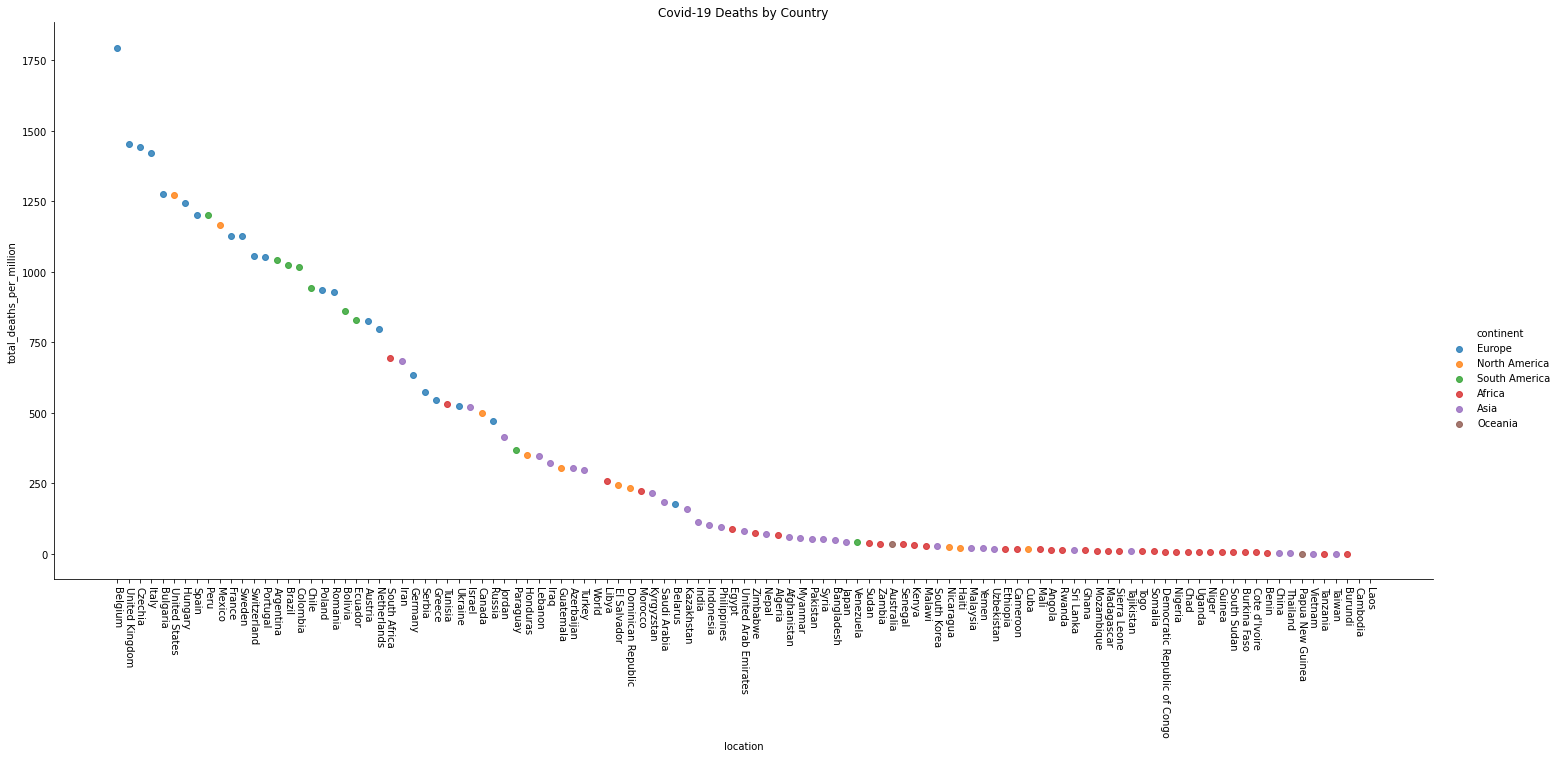

In [12]:

df_pop = dfpop.loc[:, ('date', 'location', 'total_deaths', 'continent', 'population', 'total_deaths_per_million')]
df_pop['death_pop'] = df_pop['total_deaths']/df_pop['population']

df_pop = df_pop.sort_values(by='total_deaths_per_million', ascending=False)
plt.figure(figsize=(30,20))

sns.lmplot(x='location', y='total_deaths_per_million', data=df_pop,
           fit_reg=False, # No regression line
           hue='continent', height=8.27, aspect=20/8.27)   # Color by continent

# Set title with matplotlib
plt.title('Covid-19 Deaths by Country')
# Rotate x-labels
plt.xticks(rotation=-90);

In [13]:
df_denmark = df[df['location']=='Denmark']
df_denmark.shape


(366, 59)

In [14]:
df_usa = df[df['location']=='United States']
df_usa.shape

(371, 59)

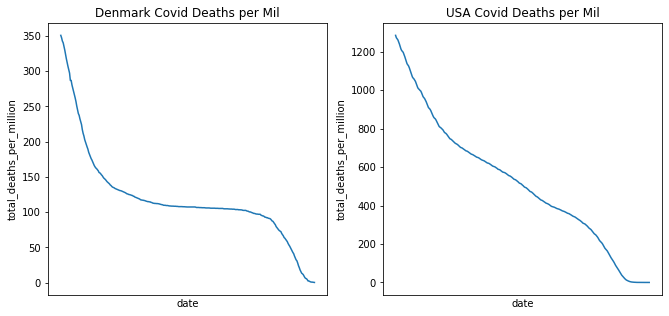

In [15]:
# Here we can see the shape of the Covid curves between the two countries, but beware that
# the y labels are at a different scale. These graphs should be on one graph so that the 
# different scales should be realized easily.

plt.figure(figsize=(11,5))
plt.subplot(1, 2, 1)

sns.lineplot(x='date', y='total_deaths_per_million', data=df_denmark)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title('Denmark Covid Deaths per Mil')


plt.subplot(1, 2, 2)

sns.lineplot(x='date', y='total_deaths_per_million', data=df_usa)
plt.tick_params(
    axis='x',
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 
plt.title('USA Covid Deaths per Mil')
plt.show()

In [20]:
# https://www.usnews.com/news/best-countries/overall-rankings
#df = titanic[(titanic["Pclass"] == 2) | (titanic["Pclass"] == 3)]
df_top20 = df[(df['location']== 'Switzerland') | (df['location']== 'Canada') | 
              (df['location']== 'Japan') | (df['location']== 'Germany') | 
              (df['location']==  'Australia') | (df['location']== 'United Kingdom') |
              (df['location']== 'United States') | (df['location']== 'Sweden') |
              (df['location']== 'Netherlands') | (df['location']== 'Norway') | 
              (df['location']== 'New Zealand') | (df['location']== 'France') | 
              (df['location']== 'Denmark') | (df['location']== 'Finland') | 
              (df['location']== 'China') | (df['location']=='Singapore') | 
              (df['location']== 'Italy') | (df['location']==  'Austria') | 
              (df['location']== 'Spain') | (df['location']=='South Korea')]

In [33]:
df_top20 = df_top20.sort_values(by='date', ascending=True)
df_top20.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
51619,KOR,Asia,South Korea,2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,...,35938.374,0.2,85.998,6.80,6.2,40.9,NaN,12.27,83.03,0.903
28264,JPN,Asia,Japan,2020-01-22,2.0,NaN,NaN,NaN,NaN,NaN,...,39002.223,NaN,79.370,5.72,11.2,33.7,NaN,13.05,84.63,0.909
11581,CHN,Asia,China,2020-01-22,548.0,NaN,NaN,17.0,NaN,NaN,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
51620,KOR,Asia,South Korea,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,...,35938.374,0.2,85.998,6.80,6.2,40.9,NaN,12.27,83.03,0.903
59029,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924


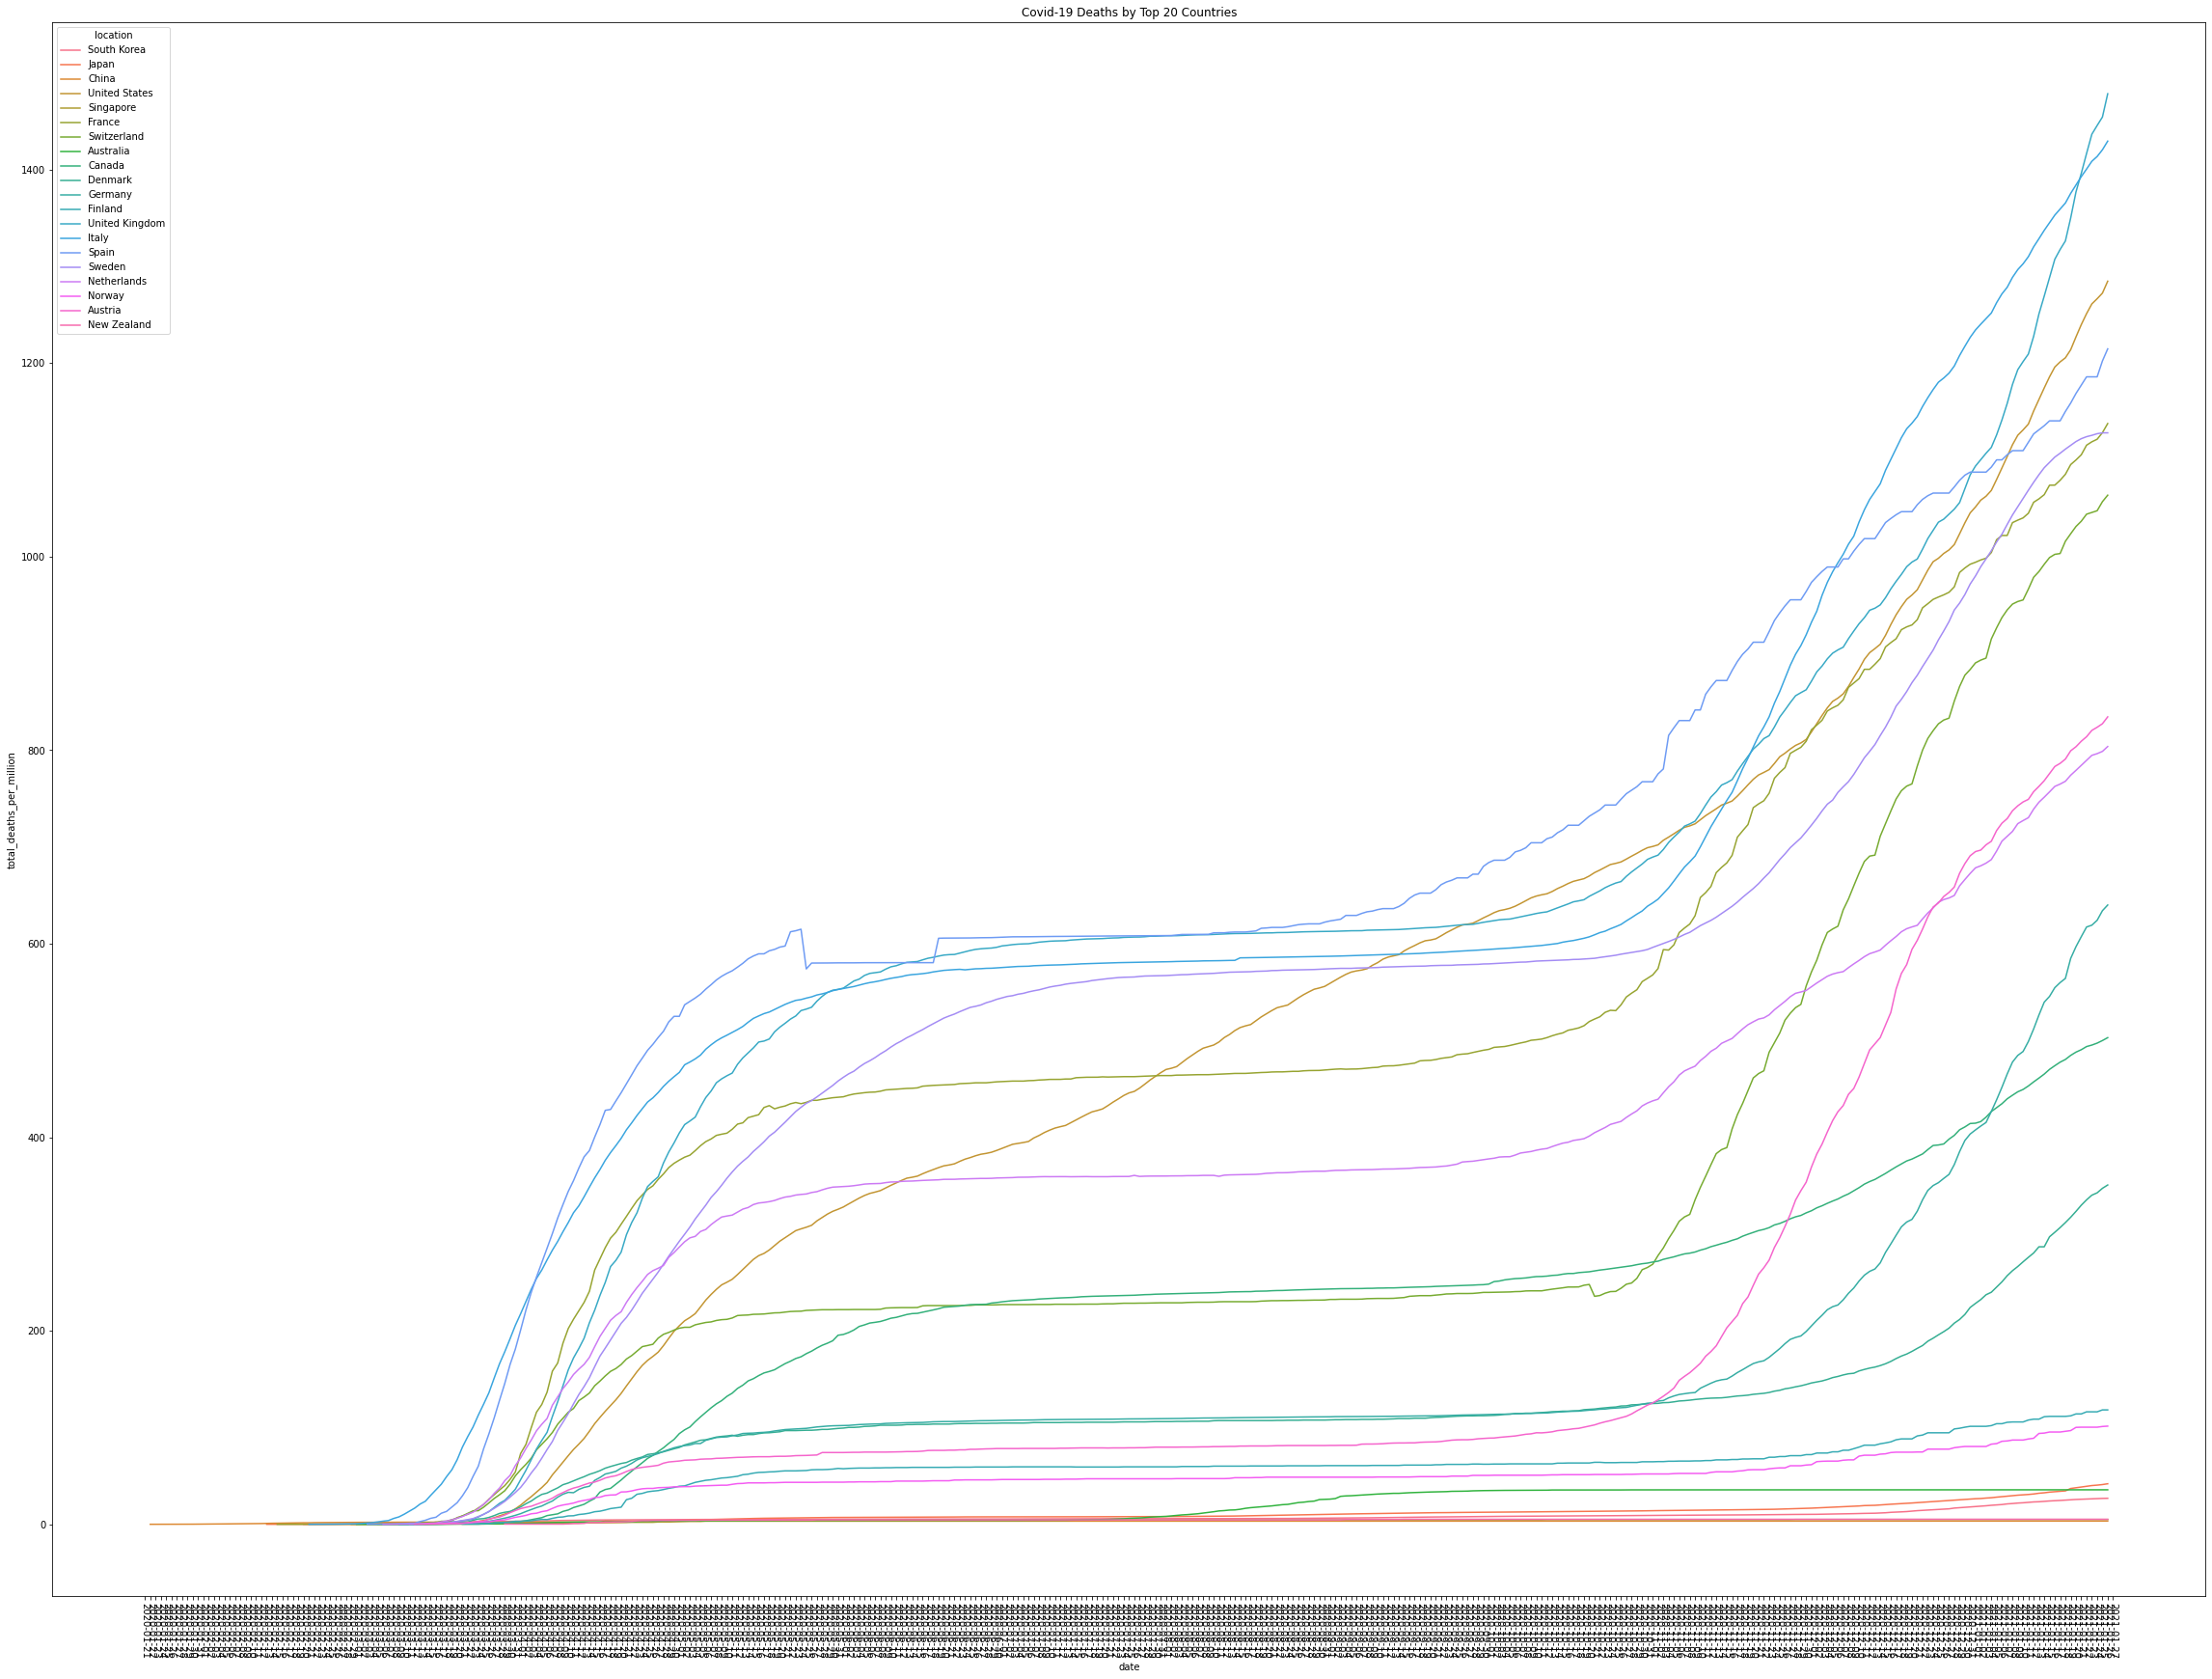

In [36]:
data= df_top20
plt.figure(figsize=(40,30))
sns.lineplot(data=data, x="date", y="total_deaths_per_million", hue="location", legend="full")
# Set title with matplotlib
plt.title('Covid-19 Deaths by Top 20 Countries')
# Rotate x-labels
plt.xticks(rotation=-90)
plt.autoscale_on=True;